In [1]:
import json
from bs4 import BeautifulSoup
import requests 
 
url = "https://www.cryptocompare.com/api/data/coinlist/"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
data = json.loads(soup.prettify())
data = data['Data']
 
print(data)  # display the content

{'BTC': {'Id': '1182', 'Url': '/coins/btc/overview', 'ImageUrl': '/media/19633/btc.png', 'Name': 'BTC', 'Symbol': 'BTC', 'CoinName': 'Bitcoin', 'FullName': 'Bitcoin (BTC)', 'Algorithm': 'SHA256', 'ProofType': 'PoW', 'FullyPremined': '0', 'TotalCoinSupply': '21000000', 'BuiltOn': 'N/A', 'SmartContractAddress': 'N/A', 'PreMinedValue': 'N/A', 'TotalCoinsFreeFloat': 'N/A', 'SortOrder': '1', 'Sponsored': False}, 'ETH': {'Id': '7605', 'Url': '/coins/eth/overview', 'ImageUrl': '/media/20646/eth_logo.png', 'Name': 'ETH', 'Symbol': 'ETH', 'CoinName': 'Ethereum', 'FullName': 'Ethereum (ETH)', 'Algorithm': 'Ethash', 'ProofType': 'PoW', 'FullyPremined': '0', 'TotalCoinSupply': '0', 'BuiltOn': 'N/A', 'SmartContractAddress': 'N/A', 'PreMinedValue': 'N/A', 'TotalCoinsFreeFloat': 'N/A', 'SortOrder': '2', 'Sponsored': False}, 'LTC': {'Id': '3808', 'Url': '/coins/ltc/overview', 'ImageUrl': '/media/19782/litecoin-logo.png', 'Name': 'LTC', 'Symbol': 'LTC', 'CoinName': 'Litecoin', 'FullName': 'Litecoin (LT

In [4]:
crypto_lst = sorted(list(data.keys()))
print(len(crypto_lst))

2918


In [5]:
import pandas as pd
import json
from bs4 import BeautifulSoup
import requests
 
url = "https://api.coinmarketcap.com/v1/ticker/"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
dic = json.loads(soup.prettify())
 
# create an empty DataFrame
df = pd.DataFrame(columns=["Ticker", "MarketCap"])
 
for i in range(len(dic)):
    df.loc[len(df)] = [dic[i]['symbol'], dic[i]['market_cap_usd']]
 
df.sort_values(by=['MarketCap'])
# apply conversion to numeric as 'df' contains lots of 'None' string as values
df.MarketCap = pd.to_numeric(df.MarketCap)

In [6]:
df

,Ticker,MarketCap
0,BTC,1.099381e+11
1,ETH,2.948552e+10
2,XRP,1.276205e+10
3,BCH,9.531060e+09
4,EOS,4.537576e+09
5,XLM,4.213980e+09
6,LTC,3.261415e+09
7,USDT,2.727275e+09
8,ADA,2.615465e+09
9,XMR,1.570276e+09


In [10]:
P = df[df.MarketCap > 30e7]
#print(P, end="\n\n")
 
portfolio = list(P.Ticker)
print(len(portfolio))

28


In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
import json
from bs4 import BeautifulSoup
import requests
 
 
def timestamp2date(timestamp):
    # function converts a Unix timestamp into Gregorian date
    return datetime.fromtimestamp(int(timestamp)).strftime('%Y-%m-%d')
 
def date2timestamp(date):
    # function coverts Gregorian date in a given format to timestamp
    return datetime.strptime(date_today, '%Y-%m-%d').timestamp()
 
 
def fetchCryptoOHLC(fsym, tsym):
    # function fetches a crypto price-series for fsym/tsym and stores
    # it in pandas DataFrame
 
    cols = ['date', 'timestamp', 'open', 'high', 'low', 'close']
    lst = ['time', 'open', 'high', 'low', 'close']
 
    timestamp_today = datetime.today().timestamp()
    curr_timestamp = timestamp_today
 
    for j in range(2):
        df = pd.DataFrame(columns=cols)
        url = "https://min-api.cryptocompare.com/data/histoday?fsym=" + fsym + "&tsym=" + tsym + "&toTs=" + str(int(curr_timestamp)) + "&limit=2000"
        response = requests.get(url)
        soup = BeautifulSoup(response.content, "html.parser")
        dic = json.loads(soup.prettify())
        for i in range(1, 2001):
            tmp = []
            for e in enumerate(lst):
                x = e[0]
                y = dic['Data'][i][e[1]]
                if(x == 0):
                    tmp.append(str(timestamp2date(y)))
                tmp.append(y)
            if(np.sum(tmp[-4::]) > 0):
                df.loc[len(df)] = np.array(tmp)
        df.index = pd.to_datetime(df.date)
        df.drop('date', axis=1, inplace=True)
        curr_timestamp = int(df.ix[0][0])
        if(j == 0):
            df0 = df.copy()
        else:
            data = pd.concat([df, df0], axis=0)
 
    return data

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:47: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


             timestamp     open     high      low    close
date                                                      
2010-07-16  1279324800  0.04951  0.04951  0.04951  0.04951
2010-07-17  1279411200  0.04951  0.08585  0.05941  0.08584
2010-07-18  1279497600  0.08584  0.09307  0.07723   0.0808
2010-07-19  1279584000   0.0808  0.08181  0.07426  0.07474
2010-07-20  1279670400  0.07474  0.07921  0.06634  0.07921
2010-07-21  1279756800  0.07921  0.08181   0.0505   0.0505
2010-07-22  1279843200   0.0505  0.06767   0.0505  0.06262
2010-07-23  1279929600  0.06262  0.06161  0.05049  0.05454
2010-07-24  1280016000  0.05454  0.05941   0.0505   0.0505
2010-07-25  1280102400   0.0505    0.056     0.05    0.056
2010-07-26  1280188800    0.056   0.0605    0.053     0.06
2010-07-27  1280275200     0.06    0.062    0.054   0.0589
2010-07-28  1280361600   0.0589   0.0699   0.0571   0.0699
2010-07-29  1280448000   0.0699   0.0698   0.0582   0.0627
2010-07-30  1280534400   0.0627  0.06889    0.056  0.067

Text(0,0.5,'USD')

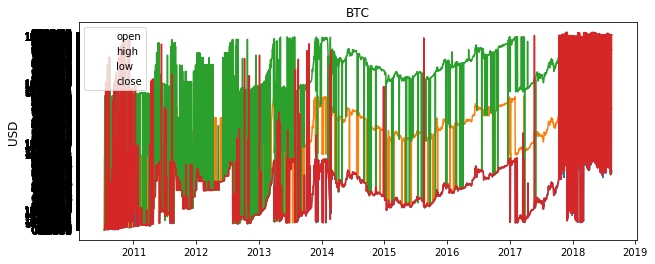

In [12]:
fsym = "BTC"
tsym = "USD"
data = fetchCryptoOHLC(fsym, tsym)
 
# print the BTC/USD OHLC price-series
print(data)
 
# plot them all
plt.figure(figsize=(10,4))
plt.plot(data.open)
plt.plot(data.high)
plt.plot(data.low)
plt.plot(data.close)
plt.legend(loc=2)
plt.title(fsym, fontsize=12)
plt.ylabel(tsym, fontsize=12)


In [13]:
# Cryptocurrencies using PCA
#
# (c) 2017 QuantAtRisk.com, by Pawel Lachowicz
 
 
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from datetime import datetime
import json
from bs4 import BeautifulSoup
import requests
 
# define some custom colours
grey = .6, .6, .6
 
 
def timestamp2date(timestamp):
    # function converts a Unix timestamp into Gregorian date
    return datetime.fromtimestamp(int(timestamp)).strftime('%Y-%m-%d')
 
def date2timestamp(date):
    # function coverts Gregorian date in a given format to timestamp
    return datetime.strptime(date_today, '%Y-%m-%d').timestamp()
 
def fetchCryptoClose(fsym, tsym):
    # function fetches the close-price time-series from cryptocompare.com
    # it may ignore USDT coin (due to near-zero pricing)
    # daily sampled
    cols = ['date', 'timestamp', fsym]
    lst = ['time', 'open', 'high', 'low', 'close']
    timestamp_today = datetime.today().timestamp()
    curr_timestamp = timestamp_today
 
    for j in range(2):
        df = pd.DataFrame(columns=cols)
        url = "https://min-api.cryptocompare.com/data/histoday?fsym=" + fsym + \
              "&tsym=" + tsym + "&toTs=" + str(int(curr_timestamp)) + "&limit=2000"
        response = requests.get(url)
        soup = BeautifulSoup(response.content, "html.parser")
        dic = json.loads(soup.prettify())
        for i in range(1, 2001):
            tmp = []
            for e in enumerate(lst):
                x = e[0]
                y = dic['Data'][i][e[1]]
                if(x == 0):
                    tmp.append(str(timestamp2date(y)))
                tmp.append(y)
            if(np.sum(tmp[-4::]) > 0):  # remove for USDT
                tmp = np.array(tmp)
                tmp = tmp[[0,1,4]]  # filter solely for close prices
                df.loc[len(df)] = np.array(tmp)
        # ensure a correct date format
        df.index = pd.to_datetime(df.date, format="%Y-%m-%d")
        df.drop('date', axis=1, inplace=True)
        curr_timestamp = int(df.ix[0][0])
        if(j == 0):
            df0 = df.copy()
        else:
            data = pd.concat([df, df0], axis=0)
    data.drop("timestamp", axis=1, inplace=True)
 
    return data  # DataFrame

In [14]:
fsym = ['BTC', 'ETH', 'DASH', 'XMR', 'XRP', 'LTC', 'ETC', 'XEM', 'REP', 
        'MAID', 'ZEC', 'STEEM', 'GNT', 'FCT', 'ICN', 'DGD', 
        'WAVES', 'DCR', 'LSK', 'DOGE', 'PIVX']


# vs. 
tsym = 'USD'

In [15]:
fsym2 = ['BTC',
'ETH',
'XRP',
'BCH',
'EOS',
'LTC',
'XLM',
'ADA',
'MIOTA',
'TRX',
'USDT',
'NEO',
'DASH',
'XMR',
'BNB',
'XEM',
'VEN',
'ETC',
'QTUM',
'OMG',
'ONT',
'ZEC',
'ICX',
'BCN',
'LSK',
'ZIL',
'DCR',
'AE',
'BTM',
'BTG',
'ZRX',
'SC',
'STEEM',
'BTS',
'XVG',
'RHOC',
'BCD',
'REP',
'NANO',
'MKR',
'WAVES',
'DOGE',
'GNT',
'PPT',
'STRAT',
'BTCP',
'WAN',
'DGB',
'WTC',
'SNT',
'BAT',
'NAS']

In [16]:
for e in enumerate(fsym2):
    print(e[0], e[1])
    if(e[0] == 0):
        try:
            data = fetchCryptoClose(e[1], tsym)
        except:
            pass
    else:
        try:
            data = data.join(fetchCryptoClose(e[1], tsym))
        except:
            pass
 
data = data.astype(float)  # ensure values to be floats
 
# save portfolio to a file (HDF5 file format)
store = pd.HDFStore('portfolio.h5')
store['data'] = data
store.close()
 
# read in your portfolio from a file
df = pd.read_hdf('portfolio.h5', 'data')
print(df)

0 BTC


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:58: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


1 ETH
2 XRP
3 BCH
4 EOS
5 LTC
6 XLM
7 ADA
8 MIOTA
9 TRX
10 USDT
11 NEO
12 DASH
13 XMR
14 BNB
15 XEM
16 VEN
17 ETC
18 QTUM
19 OMG
20 ONT
21 ZEC
22 ICX
23 BCN
24 LSK
25 ZIL
26 DCR
27 AE
28 BTM
29 BTG
30 ZRX
31 SC
32 STEEM
33 BTS
34 XVG
35 RHOC
36 BCD
37 REP
38 NANO
39 MKR
40 WAVES
41 DOGE
42 GNT
43 PPT
44 STRAT
45 BTCP
46 WAN
47 DGB
48 WTC
49 SNT
50 BAT
51 NAS
                   BTC     ETH     XRP      BCH    EOS     LTC     XLM  \
date                                                                     
2010-07-16     0.04951     NaN     NaN      NaN    NaN     NaN     NaN   
2010-07-17     0.05941     NaN     NaN      NaN    NaN     NaN     NaN   
2010-07-18     0.07723     NaN     NaN      NaN    NaN     NaN     NaN   
2010-07-19     0.07426     NaN     NaN      NaN    NaN     NaN     NaN   
2010-07-20     0.06634     NaN     NaN      NaN    NaN     NaN     NaN   
2010-07-21     0.05050     NaN     NaN      NaN    NaN     NaN     NaN   
2010-07-22     0.05050     NaN     NaN      NaN

In [17]:
df = pd.read_hdf('portfolio.h5', 'data')
df.to_csv('portfolio.csv')
